# PROMOTION ASSIGNMENT

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

'MODELS'
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

D:\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## LOADING DATA

In [78]:
df1=pd.read_csv('promotion_data.csv')
df2=pd.read_csv('promotion_future_x.csv')

df1=df1.drop(labels=['employee_id'], axis=1)
df2=df2.drop(labels=['employee_id'], axis=1)

## Getting information about the columns and its data types

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43846 entries, 0 to 43845
Data columns (total 13 columns):
department              43846 non-null object
region                  43846 non-null object
education               41935 non-null object
gender                  43846 non-null object
recruitment_channel     43846 non-null object
no_of_trainings         43846 non-null int64
age                     43846 non-null int64
previous_year_rating    40581 non-null float64
length_of_service       43846 non-null int64
KPIs_met >80%           43846 non-null int64
awards_won?             43846 non-null int64
avg_training_score      43846 non-null int64
is_promoted             43846 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 4.3+ MB


## Statistical measures of numeric columns

In [80]:
df1.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,43846.000000,43846.000000,40581.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.254641,34.795717,3.326458,5.876910,0.352028,0.022921,63.414815,0.085162
std,0.610620,7.645751,1.261410,4.269378,0.477608,0.149654,13.378710,0.279125
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


The standard deviation is maximum for average training score followed by age

## To get the number of unique values in each column

In [81]:
df1.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

We can infer that apart from the columns described as object type there are some other potential categorical columns such as awards_won and KPI,the previous rating could be another

## To get the number of missing values in each column

In [82]:
df1.isna().sum()

department                 0
region                     0
education               1911
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3265
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

## Information about target variable

In [83]:
df1.is_promoted.value_counts()

0    40112
1     3734
Name: is_promoted, dtype: int64

We observe that the target variable is highly disbalanced

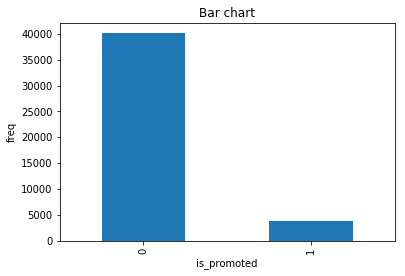

In [84]:
df1.is_promoted.value_counts().plot(kind="bar")
plt.xlabel("is_promoted")
plt.ylabel("freq")
plt.title("Bar chart")
plt.show()

__Identifying important features__

DEPARTMENT


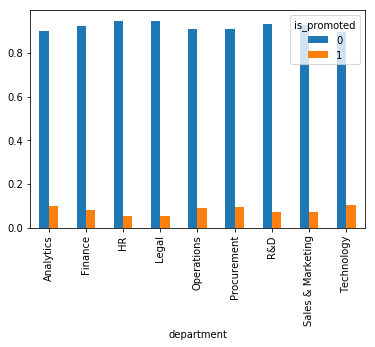



REGION


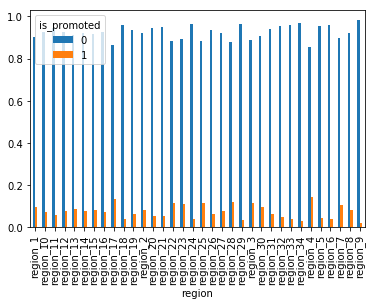



EDUCATION


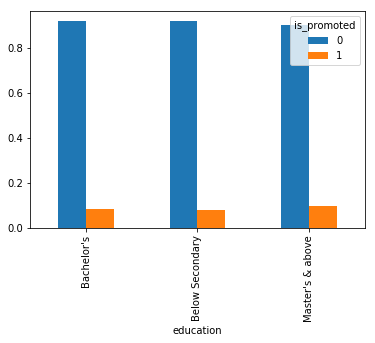



GENDER


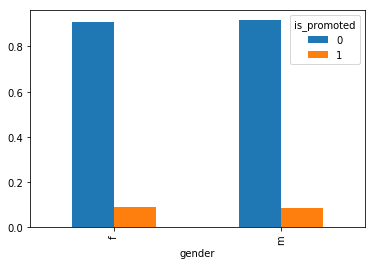



RECRUITMENT_CHANNEL


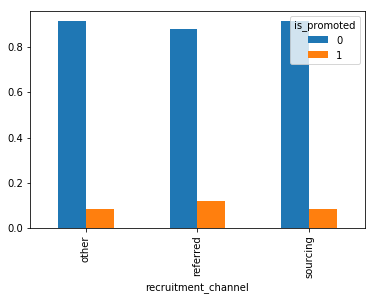



NO_OF_TRAININGS


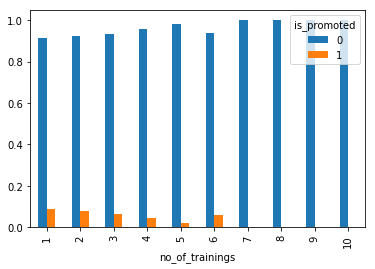



AGE


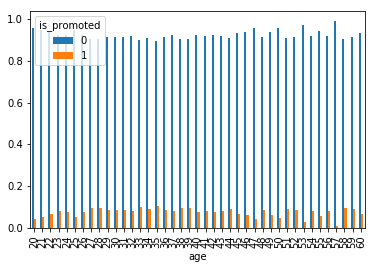



PREVIOUS_YEAR_RATING


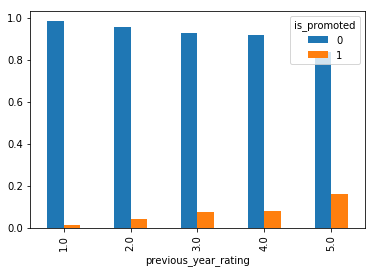



LENGTH_OF_SERVICE


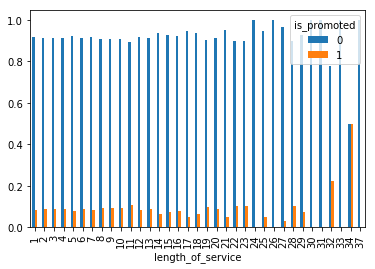



KPIS_MET >80%


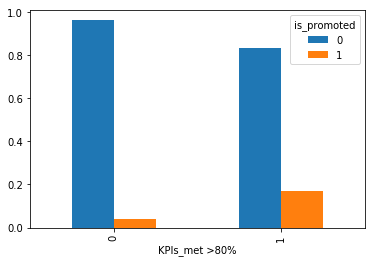



AWARDS_WON?


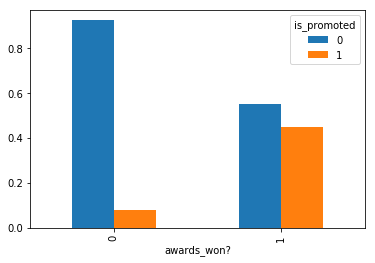



AVG_TRAINING_SCORE


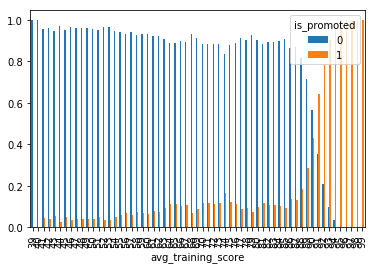

In [85]:
col=df1.columns[:-1]
for x in col:
    print(x.upper())
    pd.crosstab(df1[x], df1.is_promoted, normalize='index').plot(kind='bar')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

### Important features and Insights
['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted']

* 'avg_training_score' - May be an exponential relation with is_promoted
* 'awards_won?' - Greater % of people who won an award got promoted
* 'KPIs_met >80%' - Greater % of people who met the criterion got promoted
* 'previous_year_rating' - Appears to be a strong linear relationship wrt is_promoted
* 'no_of_trainings'- Weak inversely proportional relationship
* 'recruitment_channel'- Strong preference for reffered
* 'gender'-Almost the same no. of male and females got promoted
* 'education'- Strong preferece for Master's and above'
* 'region'- different values for different regions, but are they statistically significant
* 'department'- different values for different regions, but are they statistically significant

### Using crosstab for finding relationship between promotion,rating and awards won

In [28]:
pd.crosstab(df1.is_promoted,[df1["awards_won?"],df1["previous_year_rating"]],normalize="columns")

awards_won?                  0                                         \
previous_year_rating       1.0       2.0       3.0       4.0      5.0   
is_promoted                                                             
0                     0.987206  0.961825  0.933636  0.928045  0.85342   
1                     0.012794  0.038175  0.066364  0.071955  0.14658   

awards_won?                  1                                          
previous_year_rating       1.0       2.0       3.0       4.0       5.0  
is_promoted                                                             
0                     0.858824  0.758621  0.571885  0.577778  0.364261  
1                     0.141176  0.241379  0.428115  0.422222  0.635739

A larger proportion of people who won an award and had a rating of 5 got promoted.

## SEPARATING THE TARGET VARIABLE AND COMBINING THE 2 DATASETS

In [19]:
y = df1.is_promoted
df1.drop('is_promoted', axis=1, inplace=True)
master = pd.concat([df1,df2])
master.tail()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
10957,Analytics,region_2,Master's & above,m,other,1,51,5.0,6,1,0,81
10958,Operations,region_22,Bachelor's,m,sourcing,1,28,NaN,1,1,0,63
10959,Operations,region_11,Master's & above,m,other,1,36,3.0,3,0,0,59
10960,Sales & Marketing,region_2,Master's & above,m,other,1,36,3.0,2,1,0,55
10961,Procurement,region_29,Master's & above,m,sourcing,1,37,4.0,8,0,0,68


## Replacing na values in columns previous_year_rating by its mean and education by no record

In [20]:
master.previous_year_rating.fillna(df1.previous_year_rating.mean(), inplace=True)

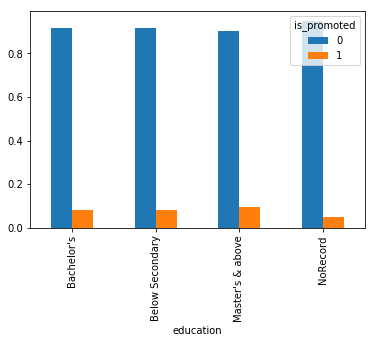

In [21]:
df1.education.fillna(value='NoRecord', inplace=True)
pd.crosstab(df1.education,y, normalize='index').plot(kind='bar')
plt.show()

__It appears that promotion rate for NA values is below the promotion rate of other education levels. It could be that No records suggest a lower level of education than is suggested in the below secondary label__

In [22]:
master.education.fillna(value='NoRecord', inplace=True)

## Feature engineering

In [34]:
Selected_features=['avg_training_score', 'KPIs_met >80%', 'department', 'previous_year_rating', 'awards_won?', 'age', 'length_of_service', 'recruitment_channel', 'no_of_trainings', 'region', 'education']
master=master[Selected_features]

master['Outstanding_score']= (master.avg_training_score>93)*1
master['Working_age']= np.logical_and((master.age>26), (master.age<45))*1
master['work_fraction'] = master['length_of_service'] / master['age']
master['start_age'] = master['age'] - master['length_of_service']
master["low_promotion_chance"]=np.logical_and((master.no_of_trainings>6),(master.no_of_trainings<=10))*1
master["high_promotion_chance"]=np.logical_and((master.previous_year_rating==5),(master["awards_won?"]==1))*1

In [35]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 10961
Data columns (total 17 columns):
avg_training_score       54808 non-null int64
KPIs_met >80%            54808 non-null int64
department               54808 non-null category
previous_year_rating     54808 non-null float64
awards_won?              54808 non-null int64
age                      54808 non-null int64
length_of_service        54808 non-null int64
recruitment_channel      54808 non-null category
no_of_trainings          54808 non-null int64
region                   54808 non-null category
education                54808 non-null category
Outstanding_score        54808 non-null int32
Working_age              54808 non-null int32
work_fraction            54808 non-null float64
start_age                54808 non-null int64
low_promotion_chance     54808 non-null int32
high_promotion_chance    54808 non-null int32
dtypes: category(4), float64(2), int32(4), int64(7)
memory usage: 5.2 MB


## Converting some variables into category

In [36]:
master.department= master.department.astype('category')
master.recruitment_channel= master.recruitment_channel.astype('category')
master.region= master.region.astype('category')
master.education= master.education.astype('category')
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 10961
Data columns (total 17 columns):
avg_training_score       54808 non-null int64
KPIs_met >80%            54808 non-null int64
department               54808 non-null category
previous_year_rating     54808 non-null float64
awards_won?              54808 non-null int64
age                      54808 non-null int64
length_of_service        54808 non-null int64
recruitment_channel      54808 non-null category
no_of_trainings          54808 non-null int64
region                   54808 non-null category
education                54808 non-null category
Outstanding_score        54808 non-null int32
Working_age              54808 non-null int32
work_fraction            54808 non-null float64
start_age                54808 non-null int64
low_promotion_chance     54808 non-null int32
high_promotion_chance    54808 non-null int32
dtypes: category(4), float64(2), int32(4), int64(7)
memory usage: 5.2 MB


## Getting dummies for logistic regression model

In [38]:
master_lin = pd.get_dummies(master, drop_first=True)

In [39]:
master_lin.head()

,avg_training_score,KPIs_met >80%,previous_year_rating,awards_won?,age,length_of_service,no_of_trainings,Outstanding_score,Working_age,work_fraction,...,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,education_NoRecord
0,47,0,4.0,0,25,3,1,0,0,0.120000,...,0,0,0,0,0,0,0,0,0,0
1,60,1,5.0,0,39,7,1,0,1,0.179487,...,0,0,0,0,0,0,0,0,1,0
2,84,1,3.0,0,30,2,1,0,1,0.066667,...,0,0,0,0,0,0,0,0,0,0
3,60,0,5.0,0,39,8,2,0,1,0.205128,...,0,0,0,0,0,0,0,0,0,0
4,69,1,3.0,0,32,7,1,0,1,0.218750,...,0,0,0,0,0,0,0,0,0,0


## HEATMAP

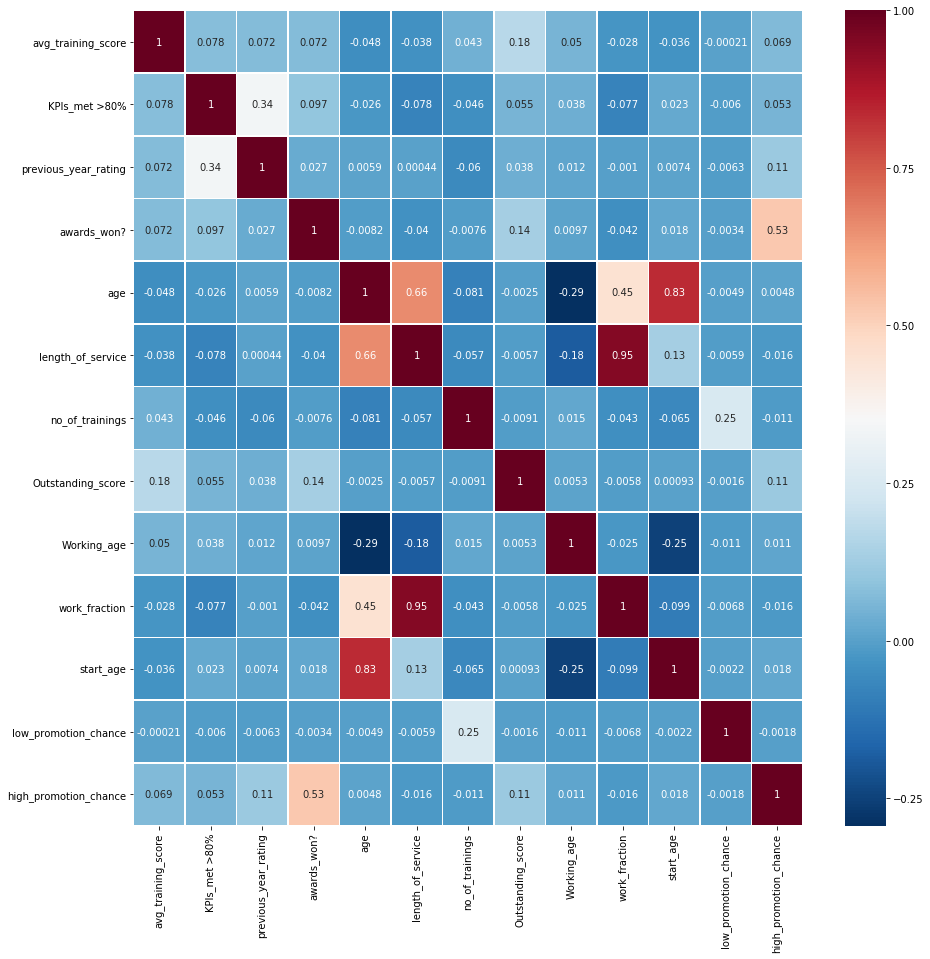

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(master.corr(),annot=True,linewidth=0.6,cmap="RdBu_r")
plt.show()

## DIVIDING THE 2 DATAFRAMES

In [41]:
past_lin = master_lin.iloc[:43846]
fut_lin = master_lin.iloc[43846:]

past_nonlin = master.iloc[:43846]
fut_nonlin = master.iloc[43846:]

## LOGISTIC REGRESSION MODEL

In [43]:
%%time
logreg=LogisticRegression()
param_grid = {'C': [1000,10000,100000,1000000], 'penalty':['l2', 'l1'],"class_weight":[{0:0.45,1:0.5},{0:0.35,1:0.75},{0:0.5,1:0.7}]}
logreg_cv=GridSearchCV(logreg, param_grid, cv=5,  n_jobs=-1,scoring="f1")
logreg_cv.fit(past_lin,y)
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 10000, 'class_weight': {0: 0.35, 1: 0.75}, 'penalty': 'l2'}
0.44175429874034183
Wall time: 13min 18s


### Converting categories into codes

In [91]:
past_nonlin.department=pd.Categorical(past_nonlin.department).codes
past_nonlin.recruitment_channel=pd.Categorical(past_nonlin.recruitment_channel).codes
past_nonlin.region=pd.Categorical(past_nonlin.region).codes
past_nonlin.education=pd.Categorical(past_nonlin.education).codes
fut_nonlin.department=pd.Categorical(fut_nonlin.department).codes
fut_nonlin.recruitment_channel=pd.Categorical(fut_nonlin.recruitment_channel).codes
fut_nonlin.region=pd.Categorical(fut_nonlin.region).codes
fut_nonlin.education=pd.Categorical(fut_nonlin.education).codes

D:\anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## RANDOM FOREST MODEL

In [46]:
%%time
forest = RandomForestClassifier(n_estimators=1000)
param_grid = {'max_depth': np.arange(3, 40), 'min_samples_split': np.arange(5, 55), "min_samples_leaf": np.arange(1, 10), "max_features": np.arange(0.01, 1.0, 0.01), "criterion": ["gini", "entropy"]}

forest_cv=RandomizedSearchCV(forest, param_grid, cv=5, random_state=29, n_jobs=-1,scoring="f1")
forest_cv.fit(past_nonlin,y)
print(forest_cv.best_params_)
print(forest_cv.best_score_)

{'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 0.86, 'max_depth': 35, 'criterion': 'entropy'}
0.4820711606915576
Wall time: 24min 58s


In [47]:
%%time
forest1 = RandomForestClassifier(n_estimators=1000)
param_grid = {'max_depth': np.arange(3,55 ), 'min_samples_split': np.arange(5, 55), "min_samples_leaf": np.arange(1, 10), "max_features": np.arange(0.01, 1.0, 0.01), "criterion": ["gini", "entropy"],"class_weight":[{0:0.45,1:0.55},{0:0.35,1:0.65},{0:0.4,1:0.6},{0:0.25,1:0.75}]}

forest1_cv=RandomizedSearchCV(forest1, param_grid, cv=5, random_state=29, n_jobs=-1,scoring="f1")
forest1_cv.fit(past_nonlin,y)
print(forest1_cv.best_params_)
print(forest1_cv.best_score_)

{'min_samples_split': 33, 'min_samples_leaf': 1, 'max_features': 0.51, 'max_depth': 31, 'criterion': 'gini', 'class_weight': {0: 0.25, 1: 0.75}}
0.48918839877771425
Wall time: 29min 2s


## DECISION TREE MODEL

In [48]:
%%time
dt = DecisionTreeClassifier()
param_grid = {'max_depth': np.arange(3, 40), 'min_samples_split': np.arange(5, 55), "min_samples_leaf": np.arange(1, 10), "max_features": np.arange(0.01, 1.0, 0.01), "criterion": ["gini", "entropy"],"class_weight":[{0:0.25,1:0.75},{0:0.35,1:0.65},{0:0.3,1:0.7},{0:0.25,1:0.75}]}

dt_cv=RandomizedSearchCV(dt, param_grid, cv=5, random_state=29, n_jobs=-1,scoring="f1")
dt_cv.fit(past_nonlin,y)
print(dt_cv.best_params_)
print(dt_cv.best_score_)

{'min_samples_split': 29, 'min_samples_leaf': 4, 'max_features': 0.75, 'max_depth': 13, 'criterion': 'entropy', 'class_weight': {0: 0.35, 1: 0.65}}
0.472639250857466
Wall time: 7.61 s


## K-NEAREST NEIGHBOURS APPROACH

In [49]:
%%time
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2,30,2),"weights":["distance","uniform"]}
# logreg_cv=RandomizedSearchCV(logreg, param_grid, cv=5, scoring='f1', random_state=29)
knn_cv=GridSearchCV(knn, param_grid, cv=5, n_jobs=-1,scoring="f1")
knn_cv.fit(past_lin, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 2, 'weights': 'distance'}
0.25311098700324086
Wall time: 15min 56s


## Ensembling Methods

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(past_nonlin, y, test_size=0.3, random_state=2990)

### ADA BOOST 

In [56]:
%%time
dt = DecisionTreeClassifier(random_state=450, max_depth=13,
    min_samples_split=29,
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.0,
    max_features=0.75,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight={0:0.35,1:0.65},criterion="entropy")
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1300, random_state=450)
ada.fit(X_train, Y_train)
y_pred = ada.predict(X_test)
# Evaluate acc_test
score_test = f1_score(Y_test, y_pred)
print(score_test) 

Test set score of ADAboost model: 0.39
Wall time: 1min 36s


## FINAL MODEL

### BAGGING CLASSIFIER 

In [96]:
%%time
dt = DecisionTreeClassifier(random_state=166, max_depth=13,
    min_samples_split=29,
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.0,
    max_features=0.75,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight={0:0.35,1:0.65},criterion="entropy")
bc = BaggingClassifier(base_estimator=dt, n_estimators=1500, random_state=166)
bc.fit(X_train, Y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate acc_test
score_test = f1_score(Y_test, y_pred)
print(score_test) 
Mansi_fut=bc.predict(fut_nonlin)
print(Mansi_fut)

0.5205306380290587
[0 0 0 ... 0 0 0]
Wall time: 1min 59s


In [97]:
dt = DecisionTreeClassifier(random_state=166, max_depth=13,
    min_samples_split=29,
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.0,
    max_features=0.75,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight={0:0.35,1:0.65},criterion="entropy")

In [98]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=1500, random_state=166)
bc.fit(X_train, Y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate acc_test
score_test = f1_score(Y_test, y_pred)
print(score_test) 

0.5205306380290587


In [102]:
Mansi_fut=bc.predict(fut_nonlin)
Mansi_fut

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# THANK YOU